In [1]:
# https://developers.google.com/codelabs/tensorflow-2-computervision#1
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

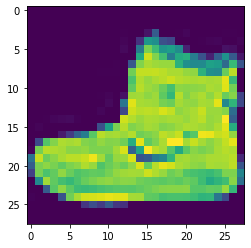

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [6]:
# normalization, 归一化。
# You'll notice that all the values are integers between 0 and 255. 
# When training a neural network, it's easier to treat all values as between 0 and 1, a process called normalization. 
# Fortunately, Python provides an easy way to normalize a list like that without looping.
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [7]:
# design model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

1. Sequential defines a sequence of layers in the neural network.
1. Flatten takes a square and turns it into a one-dimensional vector.
1. Dense adds a layer of neurons.
1. Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
1. Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
1. Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

In [9]:
# compile and train the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

2021-11-22 00:55:08.042986: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-22 00:55:08.043409: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4972 - accuracy: 0.8247
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3682 - accuracy: 0.8662
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3347 - accuracy: 0.8769
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3090 - accuracy: 0.8852
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2921 - accuracy: 0.8924


In [10]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
# test the model
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35924664149284363, 0.8733]

In [12]:
# 6. Exploration exercises
classifications = model.predict(test_images)
print(classifications[0])

[1.0689415e-05 8.0773845e-08 2.1545331e-06 1.2041324e-06 6.6931311e-06
 1.3702044e-02 1.6759562e-06 1.7227178e-02 2.2910415e-05 9.6902531e-01]


In [13]:
print(test_labels[0])

9
